# Projet IA et ML IGS

Importation des Bibliothèques utilisées

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score

# Importation de nos Données

In [41]:
data =pd.read_excel("C:\\Users\\DOROTHE\\Documents\\Ababa\\Guy\\Coeur1.xlsx")
df = data.copy()

In [42]:
df=data.copy()

In [43]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


Visualisation des 5 prémières lignes

In [44]:
df.tail()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1
917,38,homme,DNA,138,175,0,Normal,173,Non,0.0,Ascendant,0


Visualisation des 5 dernieres lignes

In [45]:
print('Shape of data',df.shape)

Shape of data (918, 12)


Dimension des lignes et colonnes

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Information générale sur les données

 # Vérification des Doublons, Données Manquantes et constantes

In [6]:
df.duplicated().sum()

0

Aucun doublons

In [31]:
df.isna().sum()/len(df)*100

AGE            0.0
SEXE           0.0
TDT            0.0
PAR            0.0
CHOLESTEROL    0.0
GAJ            0.0
ECG            0.0
FCMAX          0.0
ANGINE         0.0
DEPRESSION     0.0
PENTE          0.0
CŒUR           0.0
dtype: float64

Et aucune données manquantes

In [39]:
print(df.nunique())

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64


# Recodages des variables qualitatives et Normalisation de nos données sauf celui du Coeur

In [9]:
var_numer=df._get_numeric_data().columns
var_qual=list(set(df.columns) - set(var_numer))

In [11]:
def recoder(serie):
    return serie.astype('category').cat.codes
def codage(df):
    for  i in df.select_dtypes("object").columns:
        df[i]=recoder(df[i])
    return df
codage(df)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,0,140,289,0,1,172,0,0.0,0,0
1,49,0,3,160,180,0,1,156,0,1.0,2,1
2,37,1,0,130,283,0,2,98,0,0.0,0,0
3,48,0,1,138,214,0,1,108,1,1.5,2,1
4,54,1,3,150,195,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,2,110,264,0,1,132,0,1.2,2,1
914,68,1,1,144,193,1,1,141,0,3.4,2,1
915,57,1,1,130,131,0,1,115,1,1.2,2,1
916,57,0,0,130,236,0,0,174,0,0.0,2,1


In [12]:
def lisation(df):
    for col in var_numer:
        if col=='CŒUR':
            pass
        else:
             
            df[col]=df[col]/df[col].max()
    return df
lisation(df)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.519481,1,0,0.70,0.479270,0.0,1,0.851485,0,0.000000,0,0
1,0.636364,0,3,0.80,0.298507,0.0,1,0.772277,0,0.161290,2,1
2,0.480519,1,0,0.65,0.469320,0.0,2,0.485149,0,0.000000,0,0
3,0.623377,0,1,0.69,0.354892,0.0,1,0.534653,1,0.241935,2,1
4,0.701299,1,3,0.75,0.323383,0.0,1,0.603960,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.584416,1,2,0.55,0.437811,0.0,1,0.653465,0,0.193548,2,1
914,0.883117,1,1,0.72,0.320066,1.0,1,0.698020,0,0.548387,2,1
915,0.740260,1,1,0.65,0.217247,0.0,1,0.569307,1,0.193548,2,1
916,0.740260,0,0,0.65,0.391376,0.0,0,0.861386,0,0.000000,2,1


# Décompositon en deux variables X et Y pour notre modèle de regression Logistique

In [13]:
X=df.drop("CŒUR",axis=1)
Y=df["CŒUR"]

# Découpage de nos données en test et entrainement

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [48]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of Y_train',Y_train.shape)
print('Shape of Y_test',X_test.shape)


Shape of X_train (642, 11)
Shape of X_test (276, 11)
Shape of Y_train (642,)
Shape of Y_test (276, 11)


# Création de notre modèle

In [19]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

LogisticRegression()

# Prédiction et la probabilité de notre prédiction(Score)

In [21]:
prediction=logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, Y_test)
print(score)

0.8695652173913043


Notre modèle de régression nous donne une bonne prédiction, estimé à environ 0.87

 # Précision et Sensiblité

In [23]:
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.8711656441717791
Recall:  0.9044585987261147


In [24]:
predict_value=pd.Series(logisticRegr.predict(X_test),name="prediction")
df_confusion = pd.crosstab(Y_test, predict_value)
df_confusion

prediction,0,1
CŒUR,,
0,16,28
1,11,16


# Matrice de confusion

<AxesSubplot:>

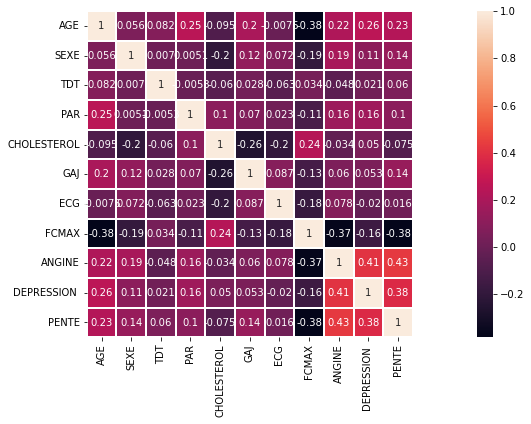

In [25]:
plt.figure(figsize=(23, 6))
sns.heatmap(X.corr(),
            square=True, linewidths=.4,annot=True)